In [1]:
import os
import numpy as np
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
import pandas as pd
from cfr import task
from wikivector import vector
from cymr import network
from rsaplot import rsaplot

In [2]:
h5_file = '/Users/morton/Dropbox/work/wikivector/use_cfr.hdf5'
patterns_file = '/Users/morton/Dropbox/work/cmr_cfr/cfr/cfr_patterns.hdf5'
data_dir = '/Users/morton/Dropbox/data/cfr'
pool_file = os.path.join(data_dir, 'pool_cfr.csv')
image_dir = os.path.join(data_dir, 'pool')
data_file = os.path.join(data_dir, 'cfr_eeg_mixed.csv')

In [3]:
vectors, items = vector.load_vectors(h5_file)
patterns = network.load_patterns(patterns_file)
pool = pd.read_csv(pool_file)
data = pd.read_csv(data_file)

In [10]:
import importlib
importlib.reload(task)
images = task.load_pool_images(pool, image_dir, rescale=.25)

In [12]:
study_data = data.loc[data['trial_type'] == 'study']
data_items = sorted(study_data['item'].unique())
pool_items = pool['item'].str.upper().to_numpy()
sem_items = items

In [13]:
np.testing.assert_array_equal(sem_items, pool_items)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


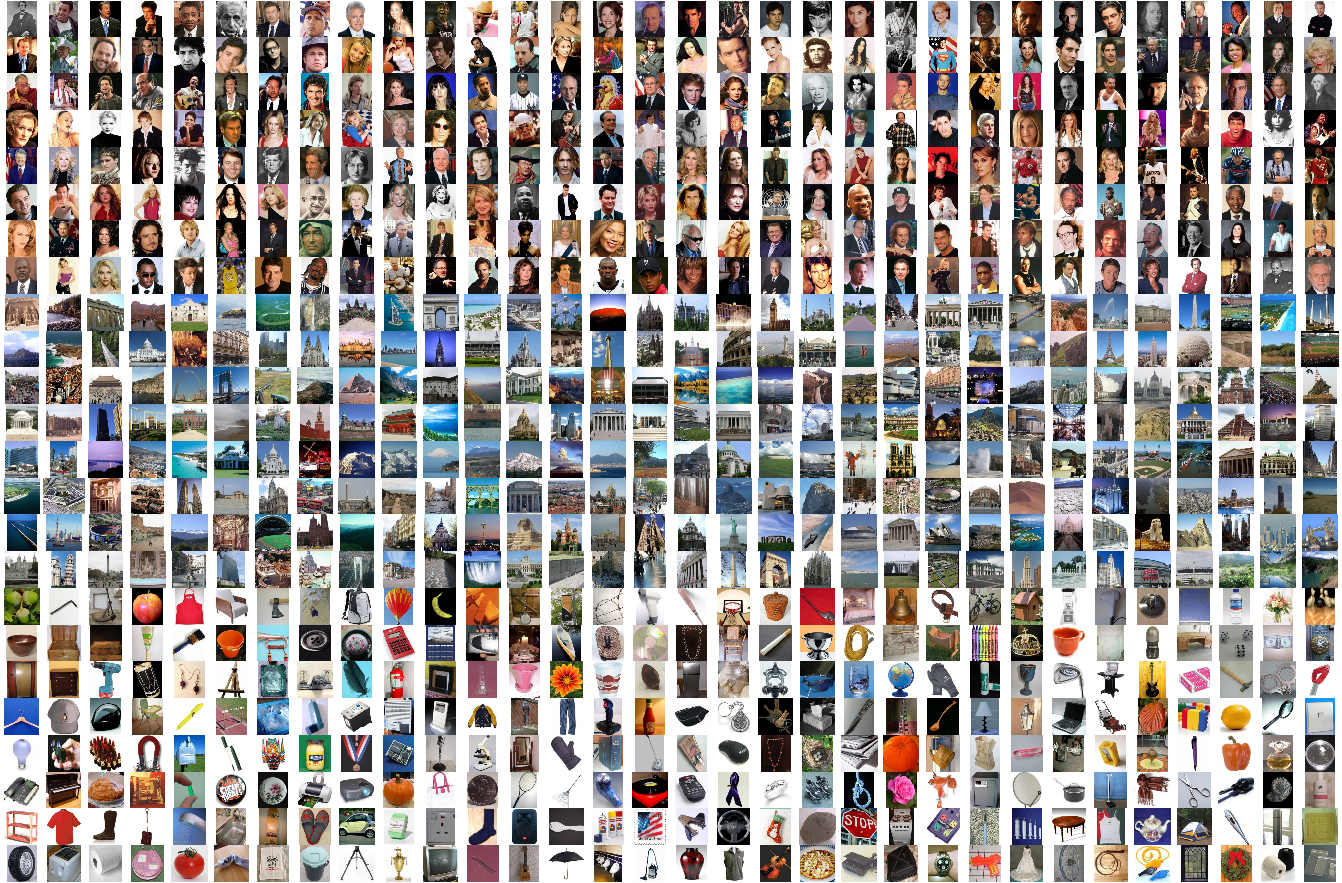

In [17]:
mat = rsaplot.image_matrix(list(images.values()), shape=(24, 32))
fig, ax = plt.subplots(figsize=(24, 32))
ax.imshow(mat)
ax.set_axis_off()
fig.savefig(os.path.join(data_dir, f'stim_matrix.png'), pad_inches=0)

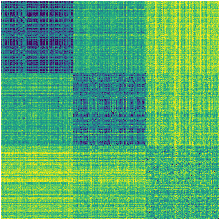

In [20]:
fig, ax = plt.subplots(figsize=(4, 4));
dsm_use = sd.squareform(sd.pdist(vectors, 'correlation'))
rsaplot.plot_dsm(dsm_use, ax=ax);
fig.savefig(os.path.join(data_dir, f'rdm_use.png'), pad_inches=0)

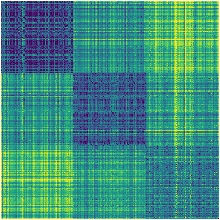

In [21]:
fig, ax = plt.subplots(figsize=(4, 4));
dsm_w2v = sd.squareform(sd.squareform(1 - patterns['similarity']['w2v'], checks=False))
rsaplot.plot_dsm(dsm_w2v, ax=ax);
fig.savefig(os.path.join(data_dir, f'rdm_w2v.png'), pad_inches=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


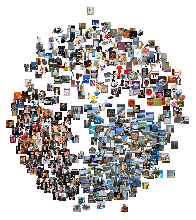

In [24]:
fig, ax = plt.subplots(figsize=(4, 4));
rsaplot.plot_mds(dsm_use, list(images.values()), ax=ax, zoom=.05);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(os.path.join(data_dir, 'mds_use.png'), pad_inches=0, dpi=300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


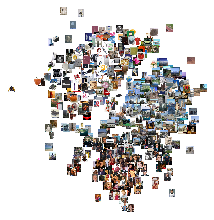

In [25]:
fig, ax = plt.subplots(figsize=(4, 4));
rsaplot.plot_mds(dsm_w2v, list(images.values()), ax=ax, zoom=.05);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(os.path.join(data_dir, 'mds_w2v.png'), pad_inches=0, dpi=300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


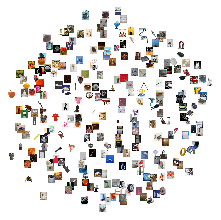

In [34]:
fig, ax = plt.subplots(figsize=(4, 4));
item_groups = {'cel': slice(None, 256), 
               'loc': slice(256, 512), 
               'obj': slice(512, None)}
for name, ind in item_groups.items():
    ax.clear()
    rsaplot.plot_mds(dsm_use, list(images.values()), ax=ax, zoom=.05, ind=ind);
    ax.set_axis_off()
    ax.set_aspect('equal')
    fig.savefig(os.path.join(data_dir, f'mds_use_{name}.png'), pad_inches=0, dpi=600)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


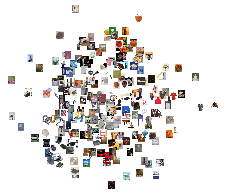

In [35]:
fig, ax = plt.subplots(figsize=(4, 4));
for name, ind in item_groups.items():
    ax.clear()
    rsaplot.plot_mds(dsm_w2v, list(images.values()), ax=ax, zoom=.05, ind=ind);
    ax.set_axis_off()
    ax.set_aspect('equal')
    fig.savefig(os.path.join(data_dir, f'mds_w2v_{name}.png'), pad_inches=0, dpi=600)